## Prepared by -- Uday Prakash Jaiswal
### Task-3 Prediction using Decision Tree Algorithm

## Decision Tree classifier and visualize it graphically.
### Dataset Used: IRIS Data 
### Target Variable: Category of Flower Based on it feature

In [27]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#loading the dataset from the url
IrisData=pd.read_csv('C:/Users/My PC/Downloads/Iris.csv')
IrisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#Some data preprocessing 
#removing the ID column - as it does not have any use in our analysis
Cols=IrisData.columns
Cols=list(Cols)
Cols.remove('Id')
IrisData=IrisData[Cols]
IrisData.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
#Information about the data
IrisData.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
print("shape of the dataset ",IrisData.shape)
IrisData.info()
#checking for null values
IrisData.isna().sum()

shape of the dataset  (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
#drop duplicate rows if any
print("Shape before removing duplicates",IrisData.shape)
IrisData=IrisData.drop_duplicates()
print("Shape before removing duplicates",IrisData.shape)

Shape before removing duplicates (150, 5)
Shape before removing duplicates (147, 5)


**There are 3 duplicate records which got removed**

## Checking the distribution of our Target Categorical Variable

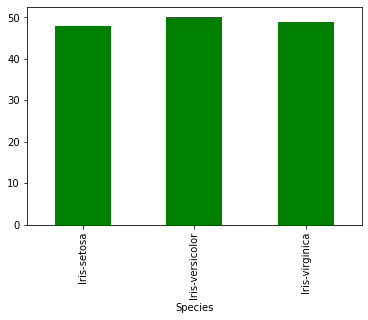

In [32]:
IrisData.groupby('Species').size().plot(kind='bar',color='green')

In [33]:
IrisData['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

## Checking the Distribution for our independent variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A95F29A60>,
      dtype=object)

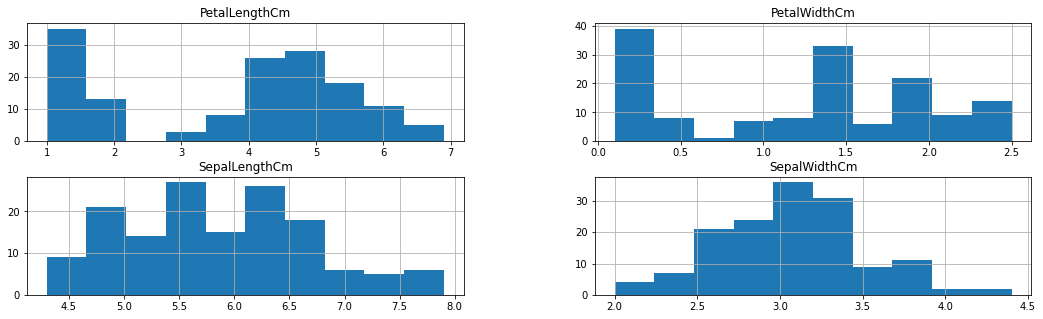

In [34]:

IrisData.hist(Cols,figsize=(18,5))

## Checking the importance and relevance of the variables with Target 

## Boxplot_Visualisation

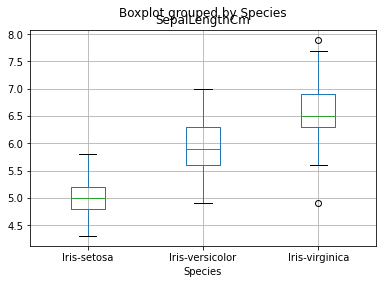

In [35]:
IrisData.boxplot(by='Species',column='SepalLengthCm')

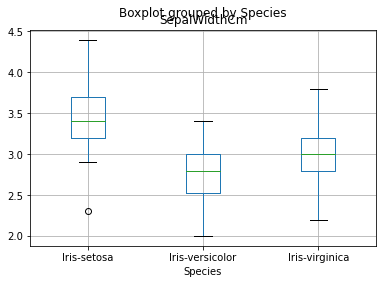

In [36]:
IrisData.boxplot(by='Species',column='SepalWidthCm')

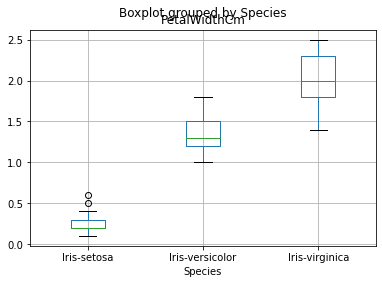

In [37]:
IrisData.boxplot(by='Species',column='PetalWidthCm')

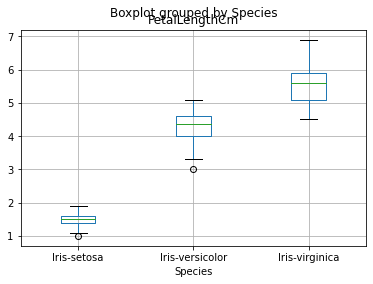

In [38]:
IrisData.boxplot(by='Species',column='PetalLengthCm')

## AnovaTest 

In [39]:
Cols.remove('Species')
from scipy.stats import f_oneway
def AnovaTest(inpData,CatCols,Target):
    print("Anova Results ----------------- ")
    ImpCatCols=[]
    
    for i in Cols:
        AnovaData=inpData.groupby(Target)[i].apply(list)
        AnovaResult=f_oneway(*AnovaData)
        if AnovaResult[1]<0.05:
            print(i,"Is CORREALTED with SPECIES | P- VALUE |",AnovaResult[1])
            ImpCatCols.append(i)
        else:
            print(i,"Is NOT - CORREALTED with SPECIES | P- VALUE |",AnovaResult[1])
    return ImpCatCols


#calling the Function
ImpCatCols=AnovaTest(IrisData,Cols,'Species')

Anova Results ----------------- 
SepalLengthCm Is CORREALTED with SPECIES | P- VALUE | 7.530911607751589e-31
SepalWidthCm Is CORREALTED with SPECIES | P- VALUE | 1.150337645778676e-16
PetalLengthCm Is CORREALTED with SPECIES | P- VALUE | 8.180545708674455e-89
PetalWidthCm Is CORREALTED with SPECIES | P- VALUE | 1.3529729471552313e-82


## Converting the categorical Species column into numerical values for our ML Model

In [40]:
IrisData.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 'Iris-setosa':0;
### 'Iris-versicolor':1;
### 'Iris-virginica':2;

In [41]:
IrisData['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2 },inplace=True)
IrisData.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Preparation for our ML model with 80% Training Data  

In [42]:
X=IrisData[Cols].values
y=IrisData['Species'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1000)
print("the shape of training data is ",X_train.shape)
print("the shape of testing data is ",X_test.shape)

the shape of training data is  (117, 4)
the shape of testing data is  (30, 4)


## DECISION TREE - MODEL TRAINING

**Checking for optimum max_depth**

In [43]:
from sklearn import tree
from sklearn import metrics
for i in range(1,10):
    clf=tree.DecisionTreeClassifier(max_depth=i,criterion='entropy')
    DTREE=clf.fit(X_train,y_train)
    prediction=DTREE.predict(X_test)
    F1_score=metrics.f1_score(y_test,prediction,average='weighted')
    print('Accuracy of the model:', np.round(F1_score,2)*100,"Depth of the tree-- ",i)

Accuracy of the model: 48.0 Depth of the tree--  1
Accuracy of the model: 93.0 Depth of the tree--  2
Accuracy of the model: 93.0 Depth of the tree--  3
Accuracy of the model: 93.0 Depth of the tree--  4
Accuracy of the model: 93.0 Depth of the tree--  5
Accuracy of the model: 93.0 Depth of the tree--  6
Accuracy of the model: 93.0 Depth of the tree--  7
Accuracy of the model: 93.0 Depth of the tree--  8
Accuracy of the model: 93.0 Depth of the tree--  9


**Accuracy of the model: 97.0   Depth of the tree--  5. This is the Optimum one with best F1_score**

## MODEL SPECIFICATION AFTER HYPER-PARAMETERISED ___OPTIMISATION

In [44]:
clf=tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')
DTREE=clf.fit(X_train,y_train)
prediction=DTREE.predict(X_test)

F1_score=metrics.f1_score(y_test,prediction,average='weighted')

print(metrics.classification_report(y_test, prediction))

print(metrics.confusion_matrix(y_test, prediction))

print('Accuracy of the model:', np.round(F1_score,2)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      1.00      0.91        10
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]
Accuracy of the model: 93.0


## Plotting The Feature Importance Chart

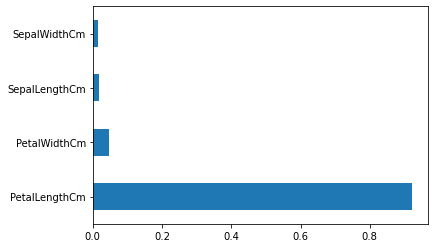

In [45]:
%matplotlib inline
feature_importance=pd.Series(DTREE.feature_importances_,index=Cols)
feature_importance.nlargest(5).plot(kind='barh')

## Predictons and MODEL EVALUATION

In [46]:
TestResult=pd.DataFrame(data=X_test,columns=Cols)
TestResult["actual"]=y_test
TestResult['Predicted']=prediction

print(metrics.confusion_matrix(y_test, prediction))

print('Accuracy of the model:', np.round(F1_score,2)*100)

TestResult.head()

[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]
Accuracy of the model: 93.0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,actual,Predicted
0,5.7,3.0,4.2,1.2,1,1
1,5.0,3.2,1.2,0.2,0,0
2,6.7,3.3,5.7,2.1,2,2
3,7.7,3.8,6.7,2.2,2,2
4,4.8,3.4,1.9,0.2,0,0


## Visualize The DECISION TREE 

In [47]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [48]:
from sklearn import datasets
iris = datasets.load_iris()

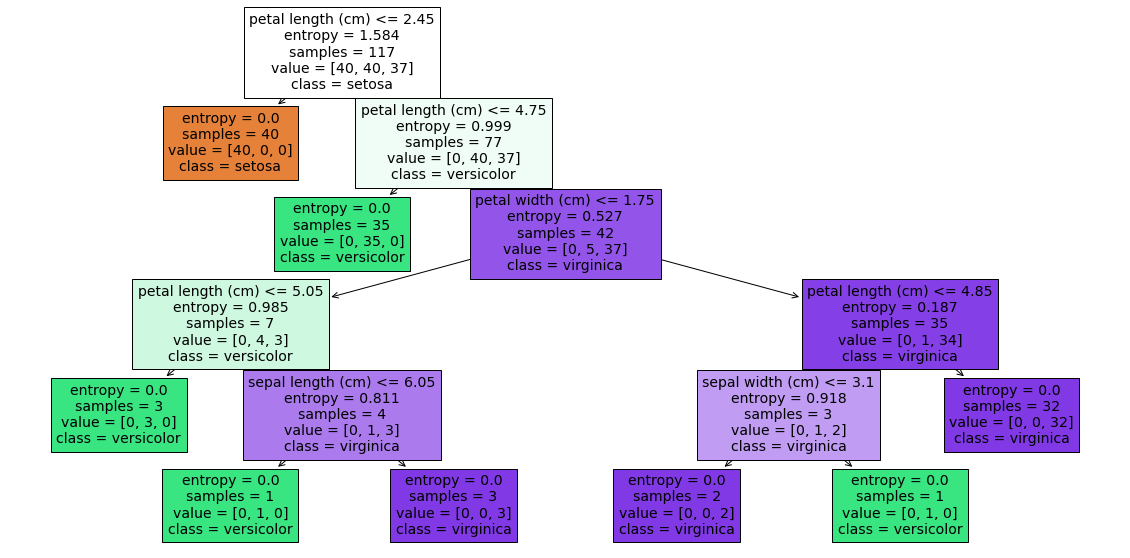

In [49]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(DTREE, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

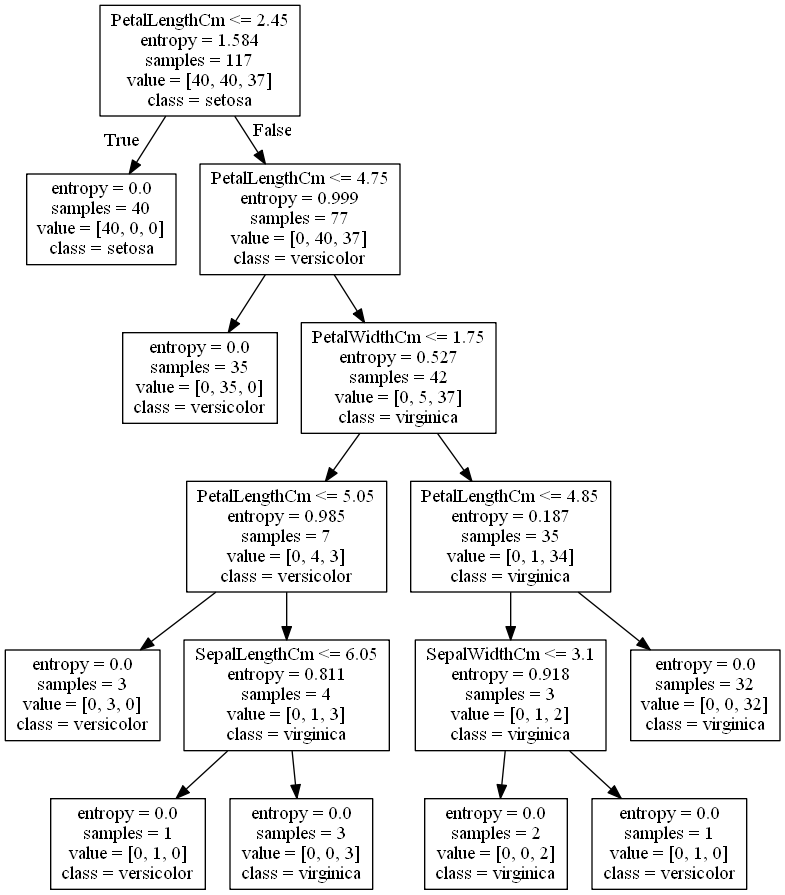

In [50]:

import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz'


from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DTREE, out_file=None, 
                                feature_names=Cols, class_names=iris.target_names)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1000,height=2000)
# Double click on the graph to zoom in